# Introduction to EDA on Video Game Sales

**EDA on Video Game Sales**

Dataset contains a list of video games with sales greater than 100,000 copies.
Fields include: Rank - Ranking of overall sales
,Name - The games name
,Platform - Platform of the games release (i.e. PC,PS4, etc.)
,Year - Year of the game's release
,Genre - Genre of the game
,Publisher - Publisher of the game
,NA_Sales - Sales in North America (in millions)
,EU_Sales - Sales in Europe (in millions)
,JP_Sales - Sales in Japan (in millions)
,Other_Sales - Sales in the rest of the world (in millions)
,Global_Sales - Total worldwide sales.

Import python libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("vgsales.csv") # Read Video game sales data

In [ ]:
df.head()
#Gives the first 5 rows of the data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()
# Lets us know null values in each column & the data type of each attribute .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.shape  # Data has 11 columns & 16598 rows

(16598, 11)

##Cleaning Data

There is small percentage of null values in Year & Publisher,which can be cleaned by dropping them off.

In [ ]:
df.isnull().sum()/len(df)

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [ ]:
dfcopy=df.dropna()

In [1]:
dfcopy.shape # After removing null vales the shape of the data is 16291 rows & 11 columns.

NameError: ignored

In [ ]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Descriptive analysis

Descriptive statistics is a scope of statistics that applies various techniques to describe and summarize any data set and studies the general behavior of the observed data, in order to facilitate problem solving. This can be done through frequency tables, graphs and measures of central tendency, such as mean, median, mode, dispersion measures such as standard deviation, percentiles and quartiles.

In [ ]:
dfcopy.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<ipython-input-11-5b68e85f3df3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix= dfcopy.corr()


<Axes: >

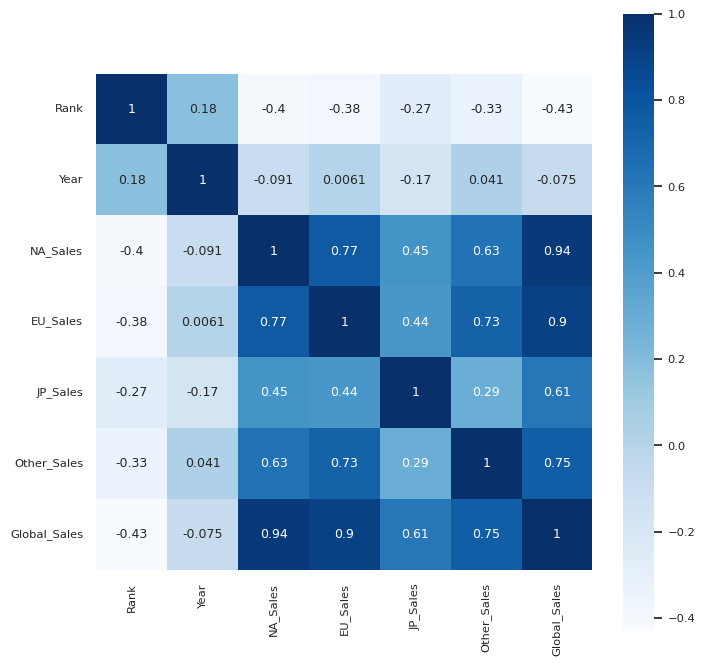

In [ ]:
# Correlation matrix gives us an overview on how different attributes in a data correlate to each other.
correlationMatrix= dfcopy.corr()
plt.figure(figsize=(8,8))
sns.set(font_scale = 0.75)
sns.heatmap(correlationMatrix, square = True, annot = True, cmap='Blues')

From the heatmap correlation matrix we can notice that NA_Sales & EU_Sales are correlated to each other,also Other region sales & Global sales are also correlated.

# Univariate Analysis

## Categorical Feature

Lets look at the highest video game platform used.

<Axes: xlabel='Platform', ylabel='count'>

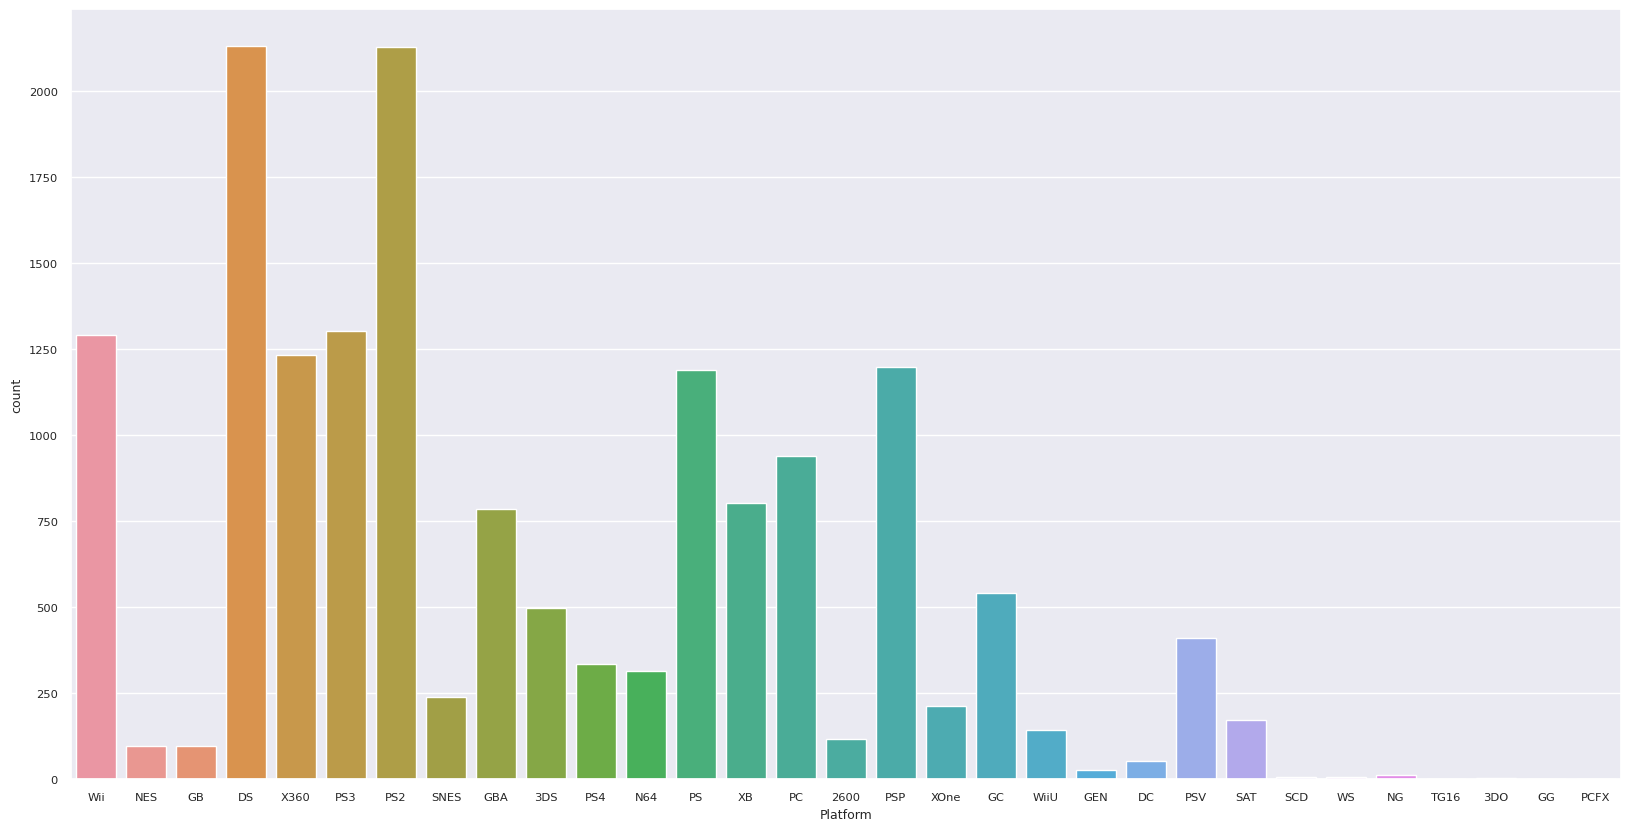

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=dfcopy,x='Platform')

DS & PS2 games has the highest number downloaded.

<Axes: xlabel='Publisher', ylabel='count'>

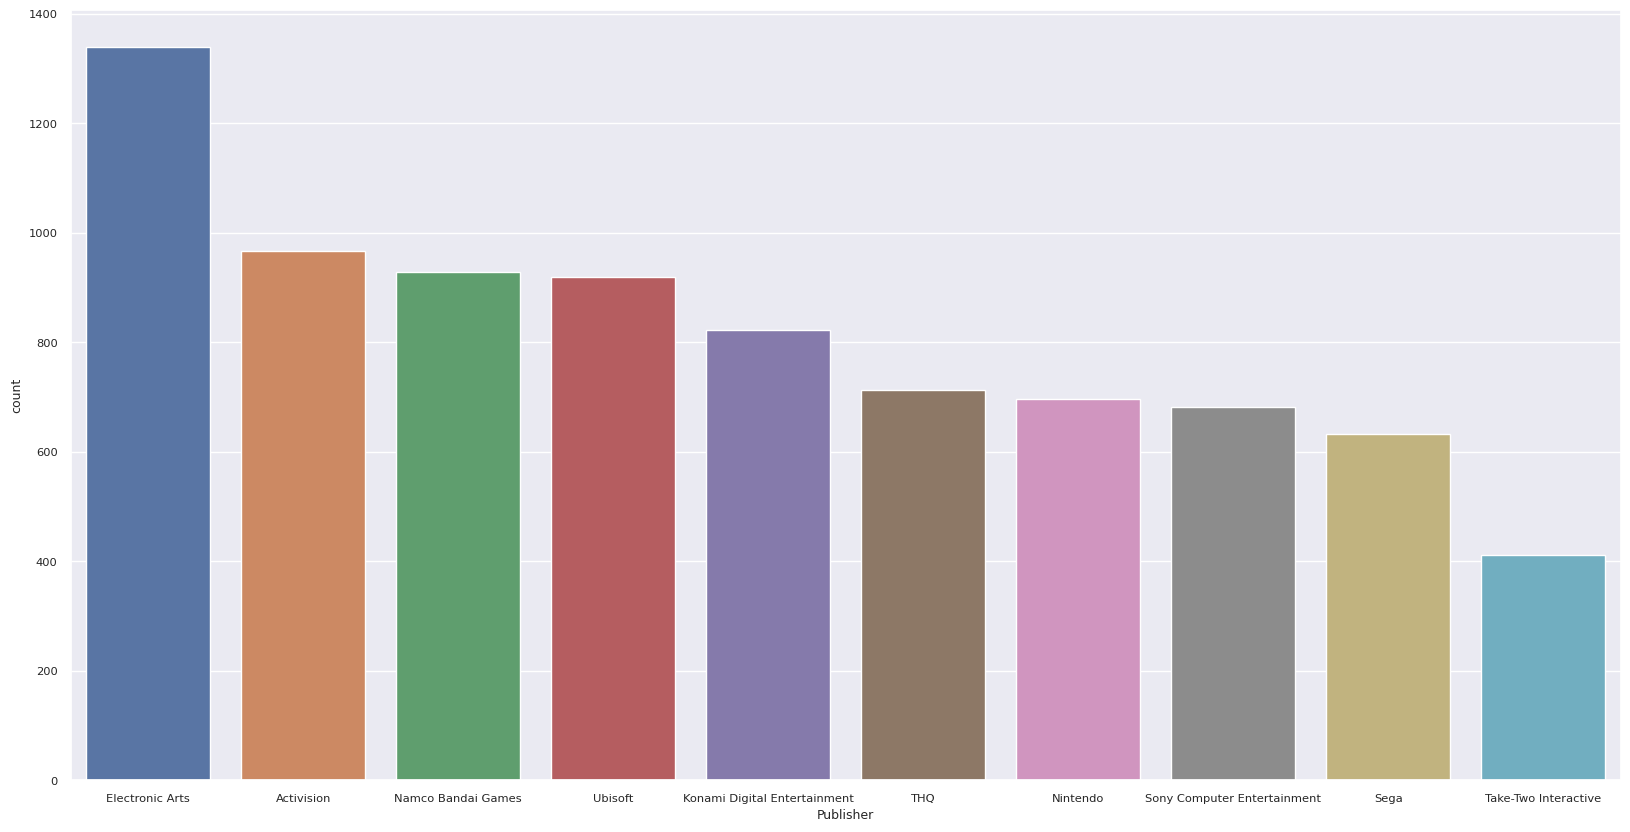

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Publisher',data=dfcopy,order=dfcopy.Publisher.value_counts().iloc[:10].index)

While looking at top 10 publishers, electronics & arts has the highest publishing.

<Axes: xlabel='Name', ylabel='count'>

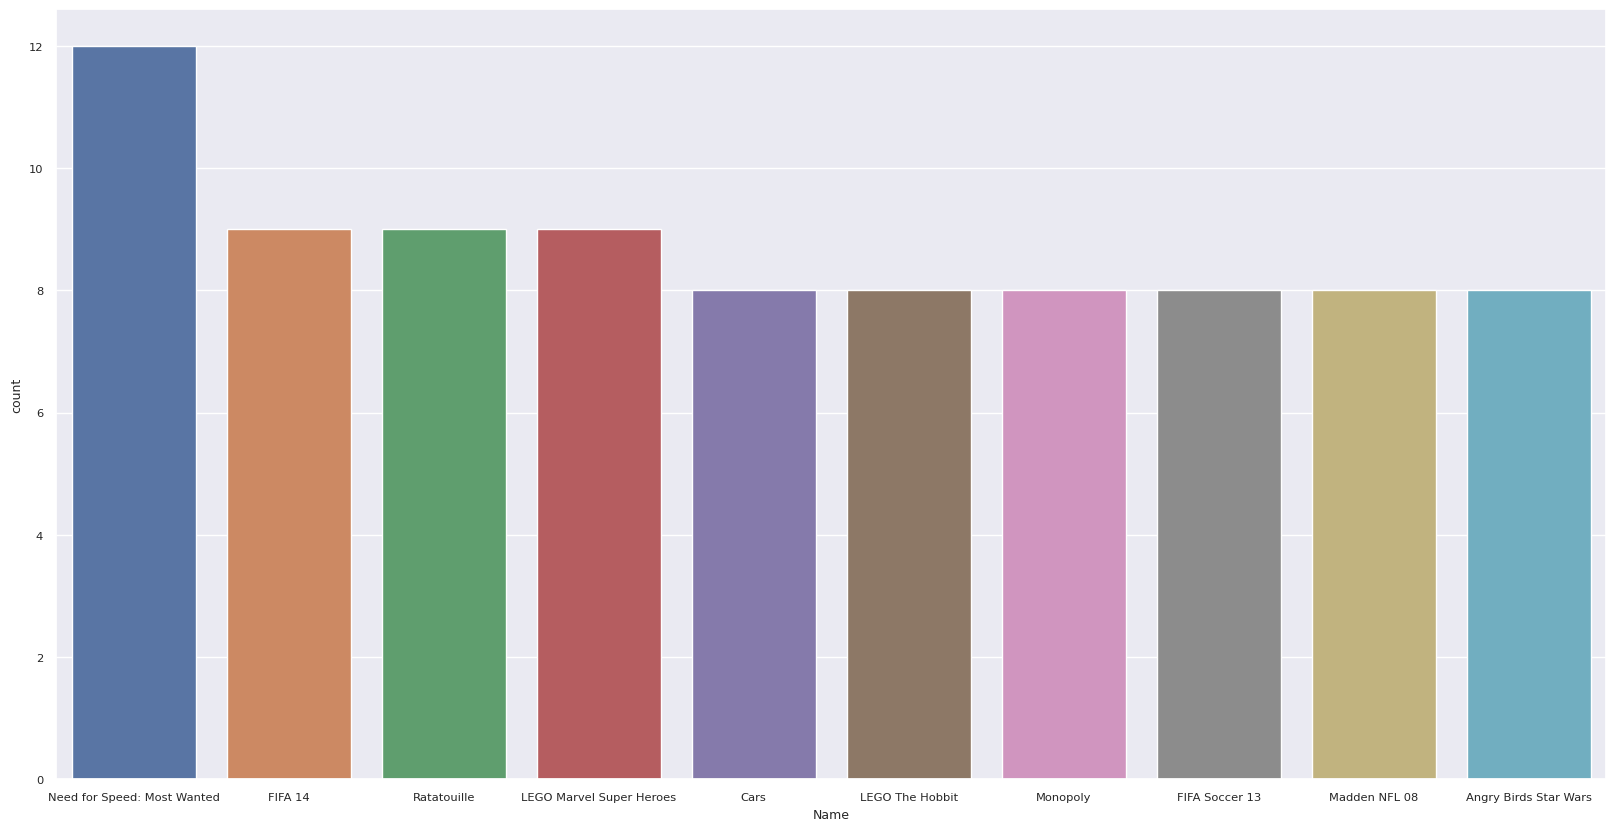

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Name',data=dfcopy,order=dfcopy.Name.value_counts().iloc[:10].index)

Looking at top 10 Games ,Need for speed has the highest count.

In [ ]:
df_games=dfcopy.Name.value_counts().iloc[:10].index
print(df_games)

Index(['Need for Speed: Most Wanted', 'FIFA 14', 'Ratatouille',
       'LEGO Marvel Super Heroes', 'Cars', 'LEGO The Hobbit', 'Monopoly',
       'FIFA Soccer 13', 'Madden NFL 08', 'Angry Birds Star Wars'],
      dtype='object')


# Bivariate Analysis

## Numerical feature

<Axes: xlabel='Year', ylabel='NA_Sales'>

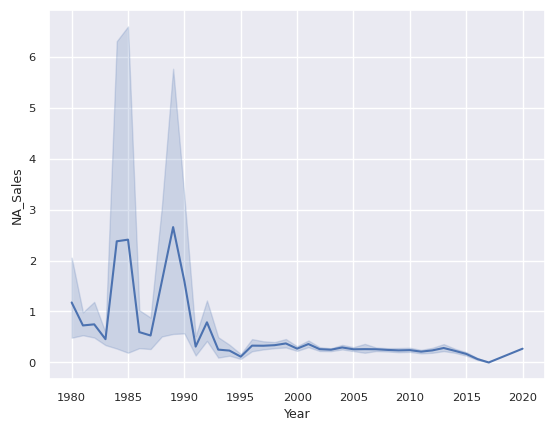

In [ ]:
sns.lineplot(data=dfcopy, x='Year',y='NA_Sales')

In [ ]:
Sales_by_game = dfcopy.groupby(['Name'])[['NA_Sales']].count().reset_index().sort_values('NA_Sales',ascending=False)
Sales_by_game.columns = ['Name','NA_Sales']
top_sales= Sales_by_game.head(10)
print(top_sales)

                              Name  NA_Sales
6582   Need for Speed: Most Wanted        12
7636                   Ratatouille         9
2873                       FIFA 14         9
5033      LEGO Marvel Super Heroes         9
331          Angry Birds Star Wars         8
9569                      Terraria         8
5030           LEGO Jurassic World         8
2874                       FIFA 15         8
5098  Lego Batman 3: Beyond Gotham         8
2890                FIFA Soccer 13         8


<Axes: xlabel='Genre', ylabel='NA_Sales'>

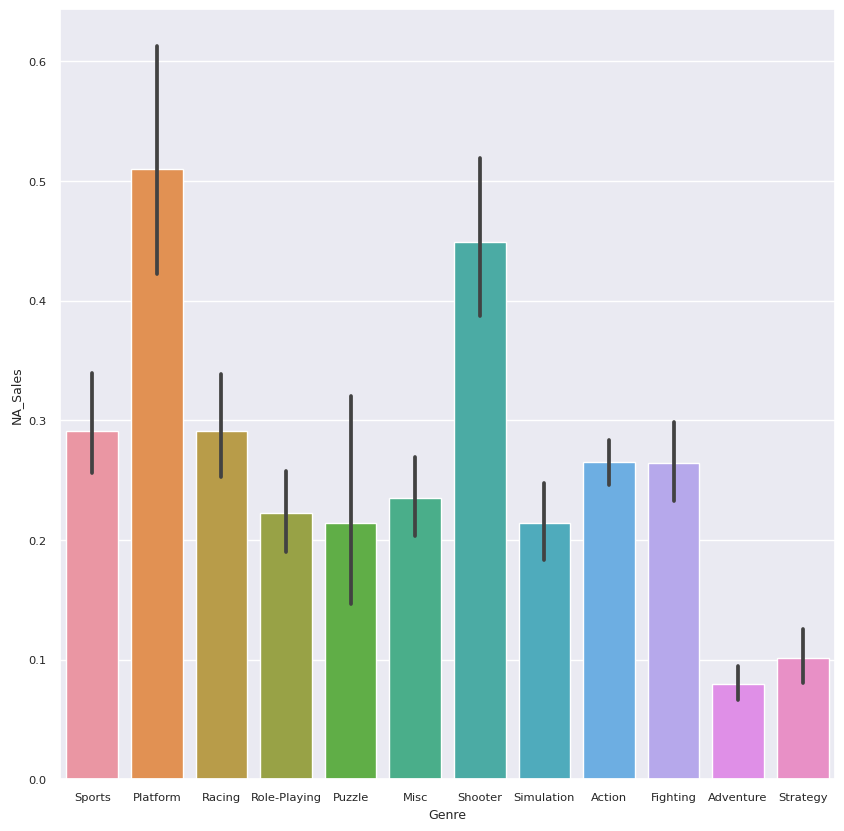

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=dfcopy, x='Genre',y='NA_Sales')

I have considered two features ,that is Year & Genre, to check the sales value in each region.


*   For North America the sales started increasing during 1980 & dropped to low sales by 1990.
*   Also whne looked at genre performance, shooter & Platform genres sales were high.




In [ ]:
EUSales_by_game = dfcopy.groupby(['Name'])[['EU_Sales']].count().reset_index().sort_values('EU_Sales',ascending=False)
EUSales_by_game.columns = ['Name','EU_Sales']
topEU_sales= EUSales_by_game.head(10)
print(topEU_sales)

                              Name  EU_Sales
6582   Need for Speed: Most Wanted        12
7636                   Ratatouille         9
2873                       FIFA 14         9
5033      LEGO Marvel Super Heroes         9
331          Angry Birds Star Wars         8
9569                      Terraria         8
5030           LEGO Jurassic World         8
2874                       FIFA 15         8
5098  Lego Batman 3: Beyond Gotham         8
2890                FIFA Soccer 13         8


<Axes: xlabel='Year', ylabel='EU_Sales'>

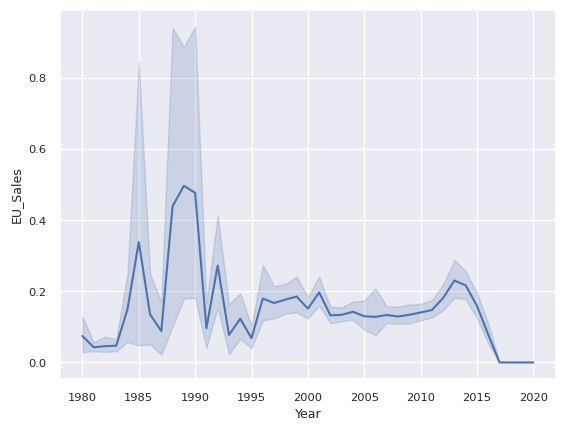

In [ ]:
sns.lineplot(data=dfcopy, x='Year',y='EU_Sales')


<Axes: xlabel='Genre', ylabel='EU_Sales'>

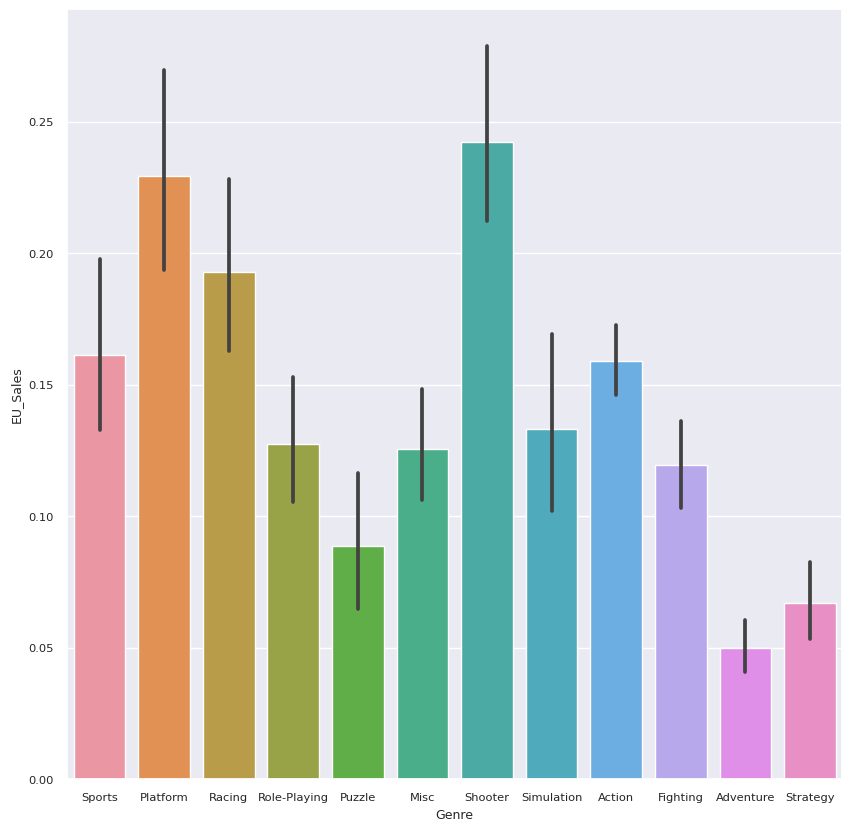

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=dfcopy, x='Genre',y='EU_Sales')

Looking at Europe region yearly sales & genre sales

*   For Europe the sales started increasing during 1980 & dropped to low sales by 1995.
*   Also when looked at genre performance, shooter & Platform genres sales were high in Europe.

In [ ]:
JPSales_by_game = dfcopy.groupby(['Name'])[['JP_Sales']].count().reset_index().sort_values('JP_Sales',ascending=False)
JPSales_by_game.columns = ['Name','JP_Sales']
topJP_sales= JPSales_by_game.head(10)
print(topJP_sales)

                              Name  JP_Sales
6582   Need for Speed: Most Wanted        12
7636                   Ratatouille         9
2873                       FIFA 14         9
5033      LEGO Marvel Super Heroes         9
331          Angry Birds Star Wars         8
9569                      Terraria         8
5030           LEGO Jurassic World         8
2874                       FIFA 15         8
5098  Lego Batman 3: Beyond Gotham         8
2890                FIFA Soccer 13         8


<Axes: xlabel='Year', ylabel='JP_Sales'>

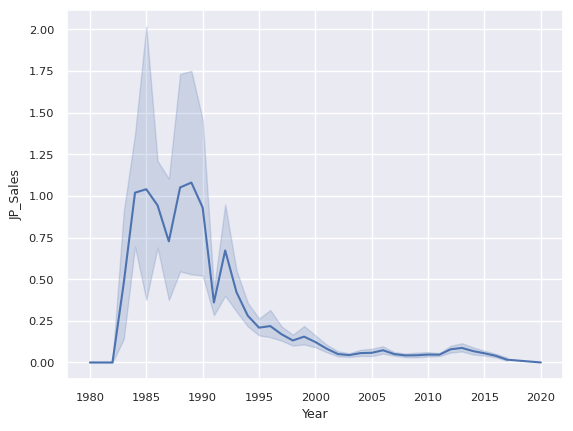

In [ ]:
sns.lineplot(data=dfcopy, x='Year',y='JP_Sales')

<Axes: xlabel='Genre', ylabel='JP_Sales'>

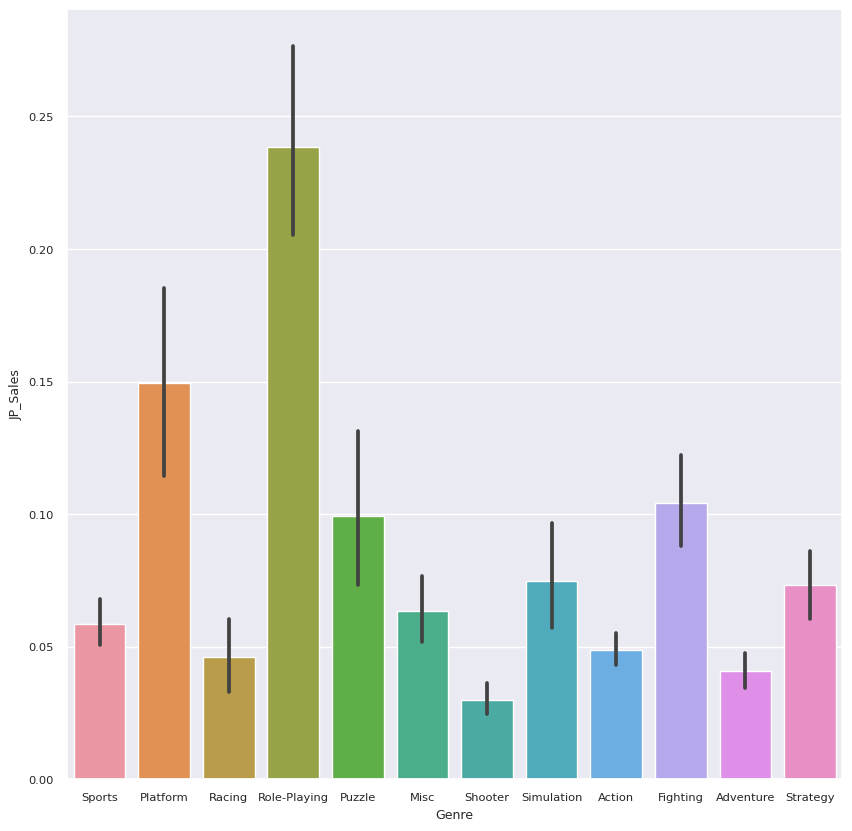

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=dfcopy, x='Genre',y='JP_Sales')

Japan did better during 1980 till 1992 period, after which it was a decresing trend in sales.
Also ,Role playing genres had high sales in Japan region.

<Axes: xlabel='Year', ylabel='Global_Sales'>

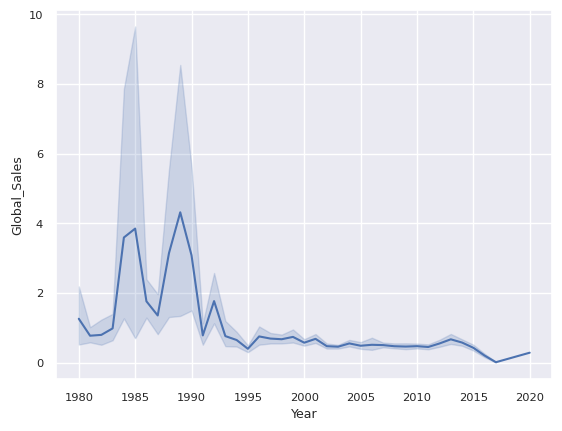

In [ ]:
sns.lineplot(data=dfcopy, x='Year',y='Global_Sales')

<Axes: xlabel='Genre', ylabel='Global_Sales'>

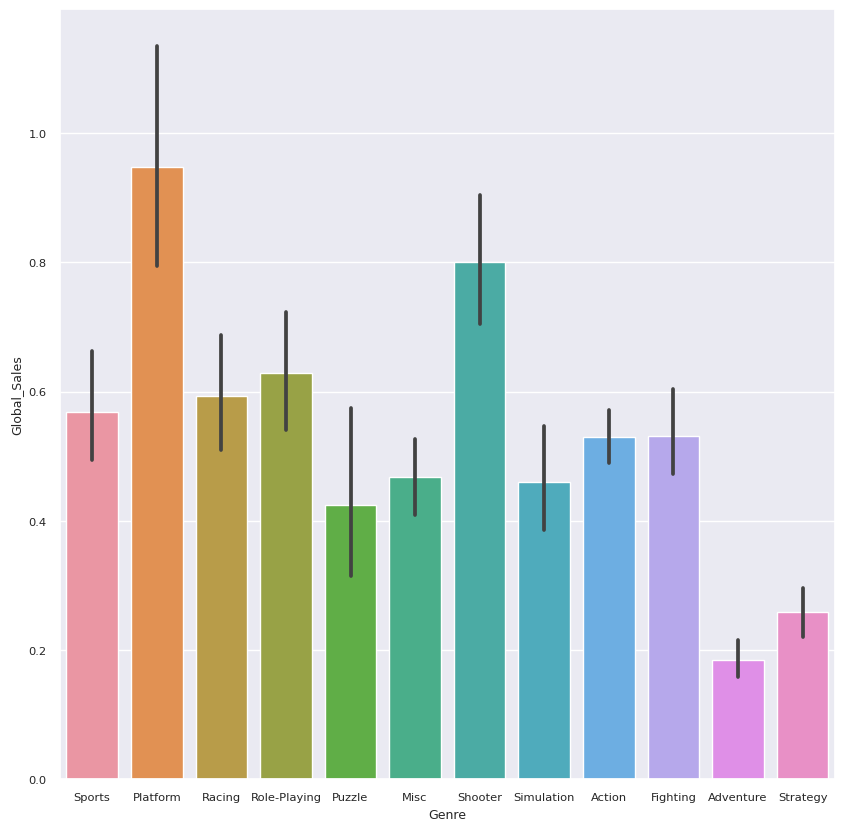

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=dfcopy, x='Genre',y='Global_Sales')

Here, we can notice that Global sales was doing better during 1980 till 1990, which is same as other region & which obvious that data for globe will be inclusive of America, Europe & all region.
Also while looking at sales of genre Platform & Shooter genres had high sales.

In [ ]:
globalSales_by_game = dfcopy.groupby(['Name'])[['Global_Sales']].count().reset_index().sort_values('Global_Sales',ascending=False)
globalSales_by_game.columns = ['Name','Global_Sales']
topglobal_sales= globalSales_by_game.head(10)
print(topglobal_sales)

                              Name  Global_Sales
6582   Need for Speed: Most Wanted            12
7636                   Ratatouille             9
2873                       FIFA 14             9
5033      LEGO Marvel Super Heroes             9
331          Angry Birds Star Wars             8
9569                      Terraria             8
5030           LEGO Jurassic World             8
2874                       FIFA 15             8
5098  Lego Batman 3: Beyond Gotham             8
2890                FIFA Soccer 13             8


,Name,Global_Sales
6582,Need for Speed: Most Wanted,12
7636,Ratatouille,9
2873,FIFA 14,9
5033,LEGO Marvel Super Heroes,9
331,Angry Birds Star Wars,8
9569,Terraria,8
5030,LEGO Jurassic World,8
2874,FIFA 15,8
5098,Lego Batman 3: Beyond Gotham,8
2890,FIFA Soccer 13,8


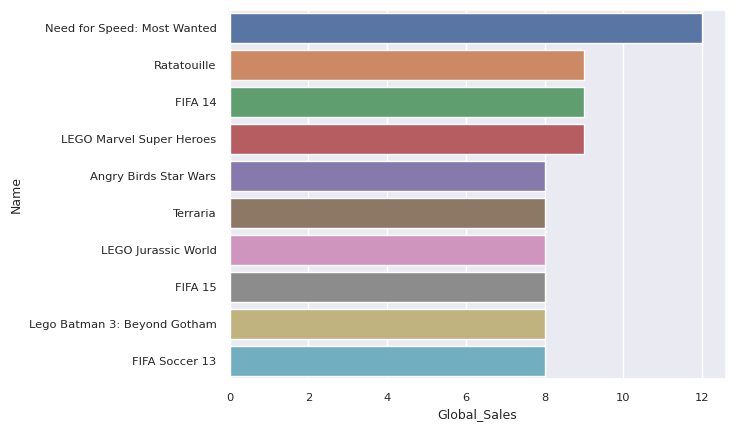

In [ ]:
sns.barplot(y = 'Name',x = 'Global_Sales', data=topglobal_sales)
topglobal_sales

Finally when we want to know which game did better considering globally,it is clear that Need for Speed: Most Wanted, Ratatouille	,Fifa 14 & LEGO Marvel Super Heroes games was top games sold over globe with more than 8million sales.